In [21]:
import pandas as pd
import matplotlib.pyplot as plt

In [22]:
enduti_usuarios_anual_2020=pd.read_csv(r'data\conjunto_de_datos_endutih_2020_csv\conjuntos_de_datos\tr_endutih_usuario_anual_2020.csv', dtype="object", encoding='latin1')

In [23]:
enduti_usuarios_anual_2021=pd.read_csv(r'data\conjunto_de_datos_endutih_2021_csv\conjuntos_de_datos\tr_endutih_usuario_anual_2021.csv', dtype="object", encoding='latin1')

In [24]:
enduti_usuarios_anual_2022=pd.read_csv(r'data\conjunto_de_datos_endutih_2022_csv\conjunto_de_datos\tr_endutih_usuarios_anual_2022.csv', dtype="object", encoding='latin1')

In [25]:
enduti_usuarios_anual_2023=pd.read_csv(r'data\conjunto_de_datos_endutih_2023_csv\conjunto_de_datos\tr_endutih_usuarios_anual_2023.csv', dtype="object", encoding='latin1')

In [26]:
# filtrar por usuarios de internet que compraron en línea en los últimos 12 meses
enduti_usuarios_anual_2023 = enduti_usuarios_anual_2023[enduti_usuarios_anual_2023['P7_21']== '1']

In [27]:
# filtrar por usuarios de internet que compraron en línea en los últimos 12 meses
enduti_usuarios_anual_2022 = enduti_usuarios_anual_2022[enduti_usuarios_anual_2022['P7_19']== '1']

In [28]:
# filtrar por usuarios de internet que compraron en línea en los últimos 12 meses
enduti_usuarios_anual_2021 = enduti_usuarios_anual_2021[enduti_usuarios_anual_2021['P7_19']== '1']

In [29]:
# filtrar por usuarios de internet que compraron en línea en los últimos 12 meses
enduti_usuarios_anual_2020 = enduti_usuarios_anual_2020[enduti_usuarios_anual_2020['P7_19']== '1']  

In [30]:
# Storing the dataframes in a dictionary for ease of access
dataframes = {
    2020: enduti_usuarios_anual_2020,
    2021: enduti_usuarios_anual_2021,
    2022: enduti_usuarios_anual_2022,
    2023: enduti_usuarios_anual_2023
}

In [31]:
age_bins = [17, 24, 30, 35, 45, 55, 65, float('inf')]
age_labels = ['18-24', '25-30', '31-35', '36-45', '46-55', '56-65', '65+']

# Assign age buckets to each dataframe
for year in dataframes:
    dataframes[year]['EDAD'] = pd.to_numeric(dataframes[year]['EDAD'], errors='coerce')
    dataframes[year]['FAC_PER'] = pd.to_numeric(dataframes[year]['FAC_PER'], errors='coerce')
    dataframes[year]['AGE_GROUP'] = pd.cut(dataframes[year]['EDAD'], bins=age_bins, labels=age_labels, right=True)

# Group by 'AGE_GROUP' and 'ESTRATO', sum 'FAC_PER' for each year
grouped_data_age_groups = {}
for year in dataframes:
    grouped_data_age_groups[year] = dataframes[year].groupby(['AGE_GROUP', 'ESTRATO'], observed=False)['FAC_PER'].sum().reset_index()


<Figure size 1200x600 with 0 Axes>

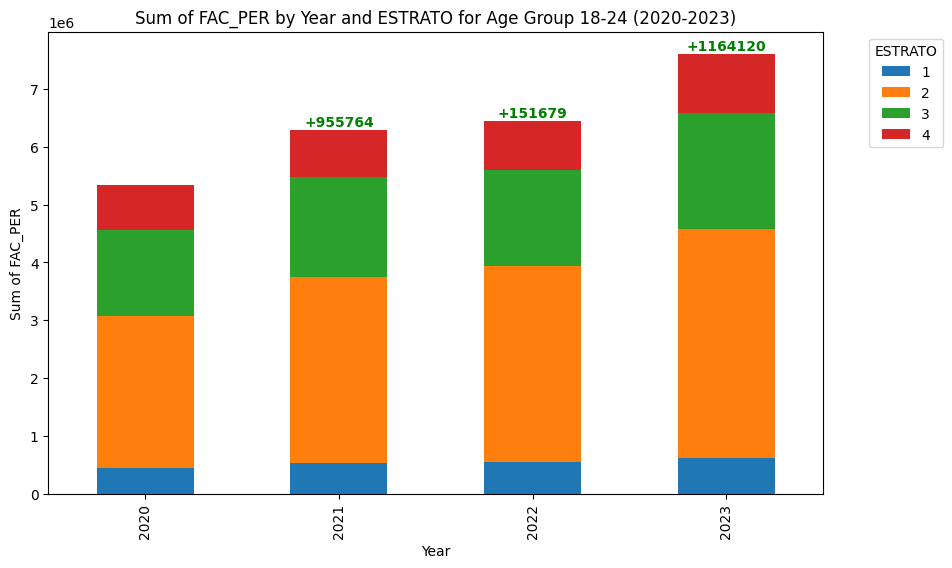

<Figure size 1200x600 with 0 Axes>

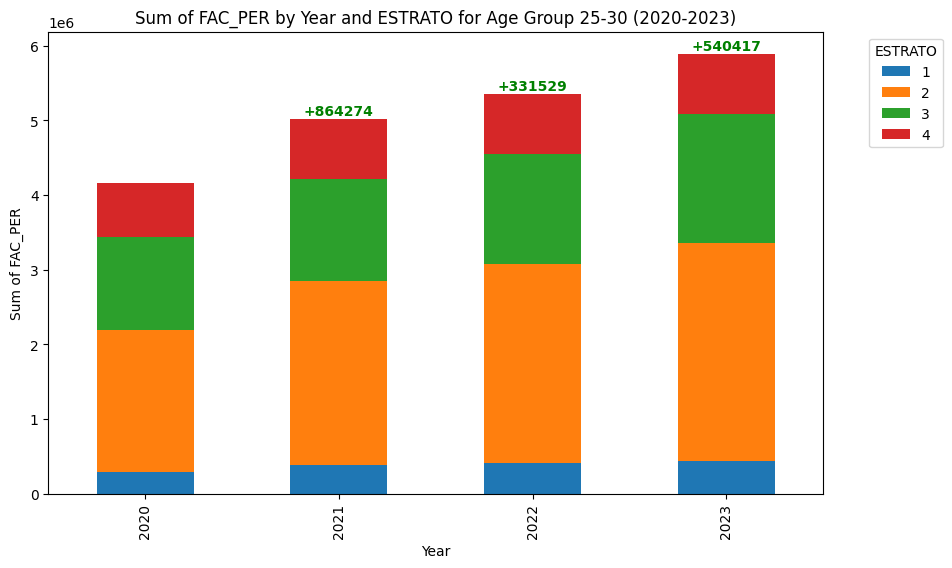

<Figure size 1200x600 with 0 Axes>

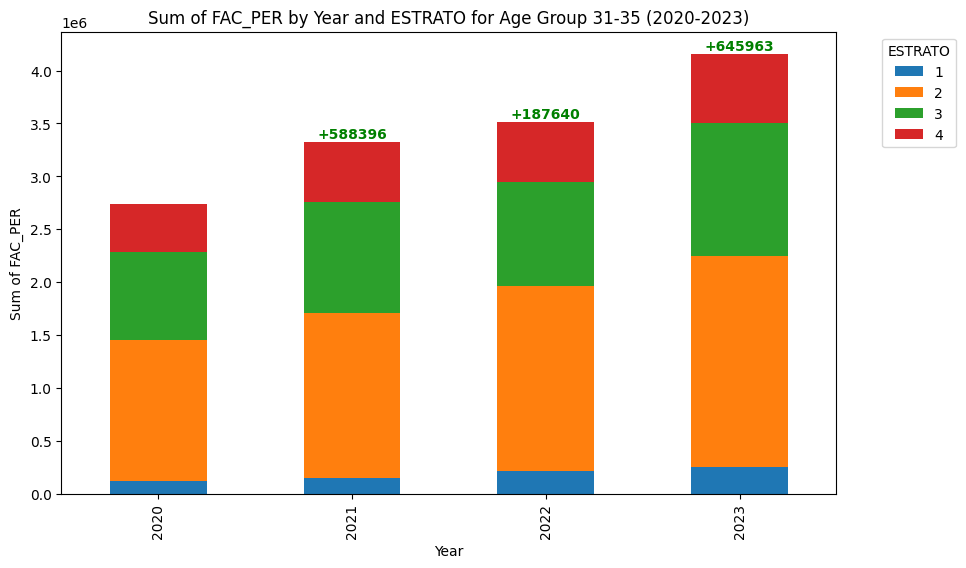

<Figure size 1200x600 with 0 Axes>

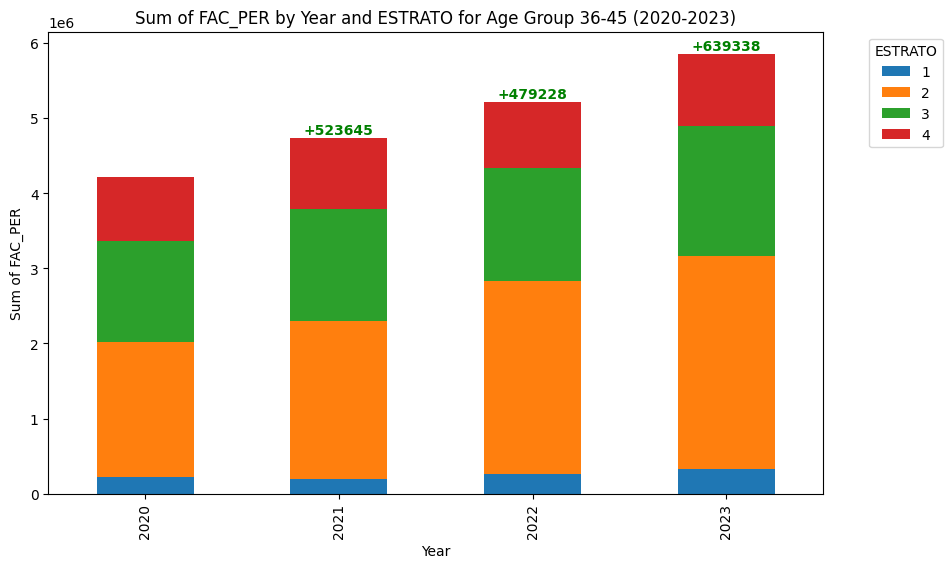

<Figure size 1200x600 with 0 Axes>

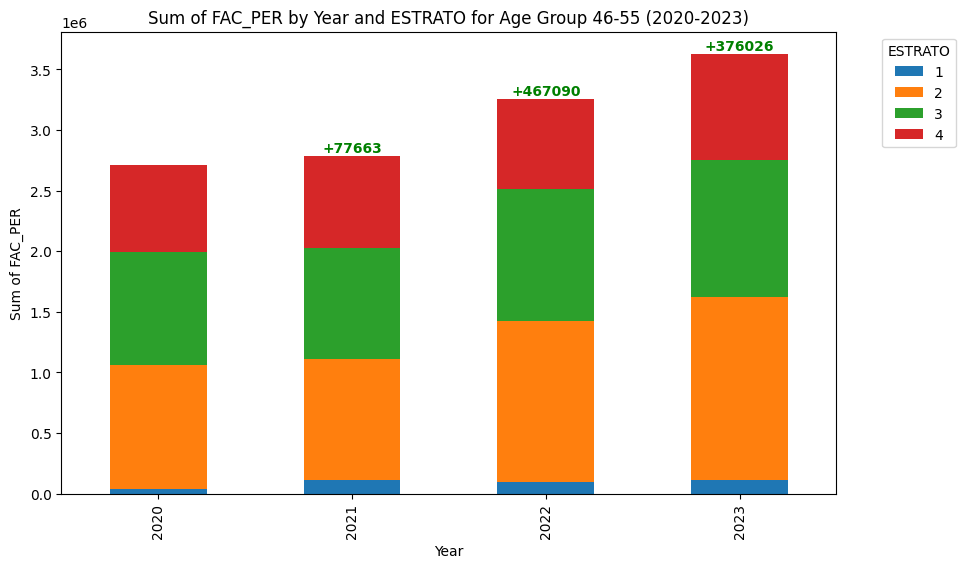

<Figure size 1200x600 with 0 Axes>

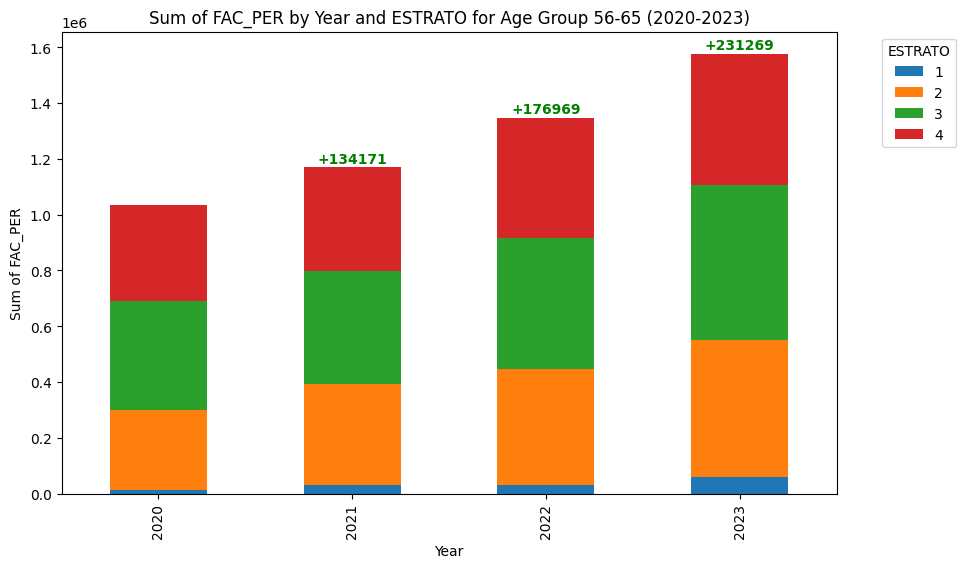

<Figure size 1200x600 with 0 Axes>

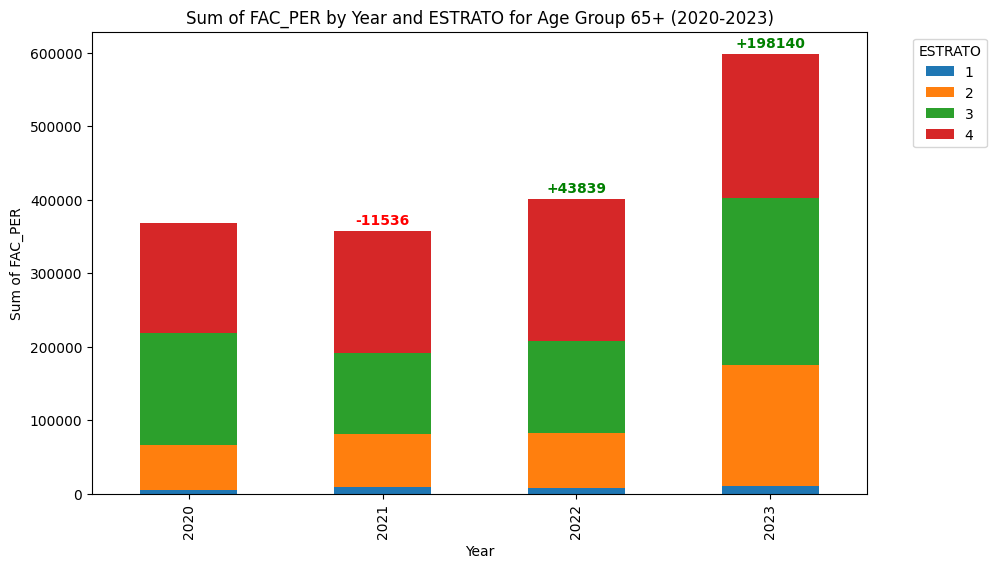

In [32]:
import numpy as np

# To avoid the SettingWithCopyWarning, use .loc to explicitly set the 'Year' column
for age_group in age_labels:
    plt.figure(figsize=(12, 6))
    data_found = False  # Flag to check if any data is available for this age group
    
    # Creating a dataframe to accumulate the data for the specific age group across the years
    age_group_data = []
    for year in grouped_data_age_groups:
        subset = grouped_data_age_groups[year][grouped_data_age_groups[year]['AGE_GROUP'] == age_group].copy()
        if not subset.empty:
            subset.loc[:, 'Year'] = year
            age_group_data.append(subset)
    
    if age_group_data:
        combined_df = pd.concat(age_group_data)
        # Pivoting the data so that each ESTRATO becomes a column
        pivot_df = combined_df.pivot_table(index='Year', columns='ESTRATO', values='FAC_PER', aggfunc='sum', fill_value=0)
        
        # Plotting the stacked bar graph
        ax = pivot_df.plot(kind='bar', stacked=True, figsize=(10, 6))
        plt.xlabel('Year')
        plt.ylabel('Sum of FAC_PER')
        plt.title(f'Sum of FAC_PER by Year and ESTRATO for Age Group {age_group} (2020-2023)')
        plt.legend(title='ESTRATO', bbox_to_anchor=(1.05, 1), loc='upper left')

        # Add the change from previous year on top of each bar
        for idx, year in enumerate(pivot_df.index):
            if idx > 0:  # Skip the first year as there's no previous year to compare
                previous_values = pivot_df.iloc[idx - 1].sum()
                current_values = pivot_df.iloc[idx].sum()
                change = current_values - previous_values
                
                # Choose color based on increase or decrease
                color = 'green' if change > 0 else 'red'
                ax.text(idx, current_values + 5000, f'{change:+.0f}', 
                        color=color, ha='center', va='bottom', fontsize=10, fontweight='bold')
        
        plt.show()
    else:
        print(f"No data available for age group {age_group} across the years.")


In [35]:
ventas_totales = enduti_usuarios_anual_2023

# Dictionary mapping categories to annual frequencies
frequency_mapping = {
    "1": 365,   # Diario (7 días a la semana)
    "2": 52,    # Al menos una vez a la semana
    "3": 24,    # Una vez cada quince días
    "4": 12,    # Una vez al mes
    "5": 2,     # Al menos una vez cada seis meses
    "6": 1      # Al menos una vez al año
}

# Applying the mapping to create a new column with annual numeric frequency
ventas_totales['P7_23_annual'] = ventas_totales['P7_23'].map(frequency_mapping)

In [40]:
ventas_totales['P7_23_annual'] = ventas_totales['P7_23_annual'].astype(int) * ventas_totales['FAC_PER'].astype(int)
print(ventas_totales['P7_23_annual'].sum())

595280366


In [41]:
muestra_datos_antad=pd.read_csv(r'data\muestra_datos_antad.csv')

In [44]:
muestra_datos_antad['visitas_mensuales'].mean()*99/ventas_totales['P7_23_annual'].sum()

0.07481667326292624